#### KPMG VIRTUAL INTERNSHIP PROJECT

**TASK: 1 - Data Quality Assessment**

##### Assessment of data quality and completeness in preparation for analysis.

##### The client provided KPMG with 3 datasets:

1.Customer Demographic

2.Customer Addresses

3.Transactions data in the past 3 months

In [164]:
# Loading all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date
sns.set(color_codes=True) 
%matplotlib inline

In [165]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the excel file and individual sheet names

In [166]:
xls = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/KPMG_data/KPMG_VI_New_raw_data_update_final.xlsx')
Transactions_data = pd.read_excel(xls, 'Transactions',skiprows=[0])
NewCustomerList_data = pd.read_excel(xls, 'NewCustomerList',skiprows=[0])
customer_demo_graphic_data = pd.read_excel(xls, 'CustomerDemographic',skiprows=[0])
CustomerAddress_data = pd.read_excel(xls, 'CustomerAddress',skiprows=[0])

<ipython-input-166-a8cda26f5c3e>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  NewCustomerList_data = pd.read_excel(xls, 'NewCustomerList',skiprows=[0])
<ipython-input-166-a8cda26f5c3e>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customer_demo_graphic_data = pd.read_excel(xls, 'CustomerDemographic',skiprows=[0])


Read the first five rows from the dataset

In [167]:
Transactions_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1.0,2.0,2950.0,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2.0,3.0,3120.0,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3.0,37.0,402.0,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4.0,88.0,3135.0,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5.0,78.0,787.0,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


How many rows and columns in this dataset

In [168]:
r,c = Transactions_data.shape
print("Number of rows  = ",r)
print("Number of parameters = ",c)

Number of rows  =  20000
Number of parameters =  13


Five point summary

In [169]:
Transactions_data.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


check null, How many null values are present, its total Count 

In [170]:
Transactions_data.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Checking the data types from this data frame.

In [171]:
Transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  float64       
 1   product_id               20000 non-null  float64       
 2   customer_id              20000 non-null  float64       
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

How many columns their in "TRANSACTIONS DATA"

In [172]:
print(len(Transactions_data.columns))

13


Checking the duplicated Values and their sum



In [173]:
Transactions_data.duplicated().sum()


0

Checking the Unique Values from this transactions dataset

In [174]:
Transactions_data.nunique() 

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

Check Missing Values for this Transacations Data Frame



In [175]:
Transactions_data.isna().head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


Exploratory Data Analysis


In [176]:
# checking the columns of this transactions data frame
Transactions_data.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

check order status with its count plot and analysis

Count of class is:
 Approved     19821
Cancelled      179
Name: order_status, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


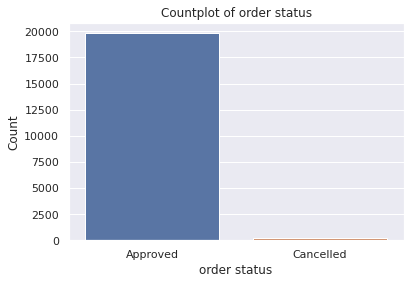

In [177]:
#create the count plot
sns.set_style('darkgrid')
sns.countplot(Transactions_data['order_status'])
plt.title("Countplot of order status")
plt.xlabel('order status')
plt.ylabel("Count")
print("Count of class is:\n",Transactions_data['order_status'].value_counts())

check Online order with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 1.0    9829
0.0    9811
Name: online_order, dtype: int64


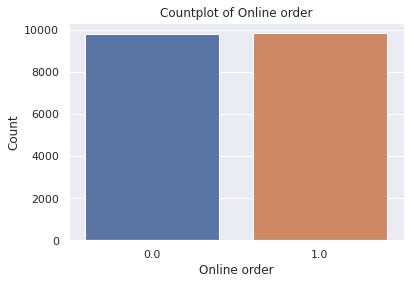

In [178]:
#create the count plot
sns.set_style('darkgrid')
sns.countplot(Transactions_data['online_order'])
plt.title("Countplot of Online order")
plt.xlabel('Online order')
plt.ylabel("Count")
print("Count of class is:\n",Transactions_data['online_order'].value_counts())


Check brand with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64


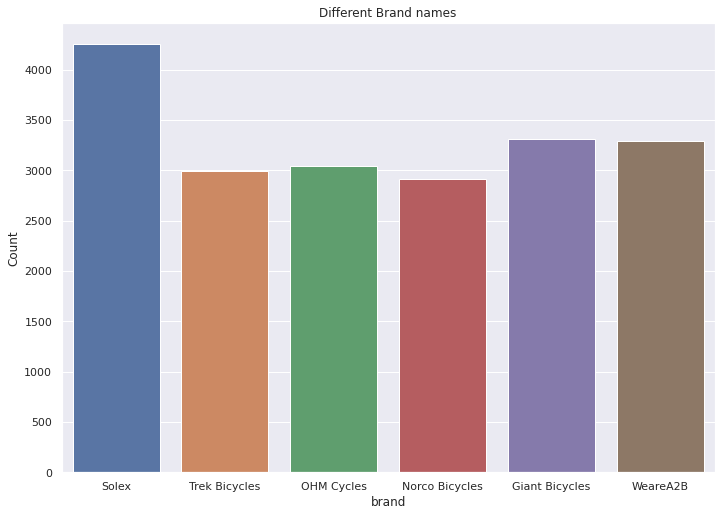

In [179]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(Transactions_data['brand'])
plt.title("Different Brand names")
plt.ylabel("Count")
print("Count of class is:\n",Transactions_data['brand'].value_counts())


Check Product Line with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64


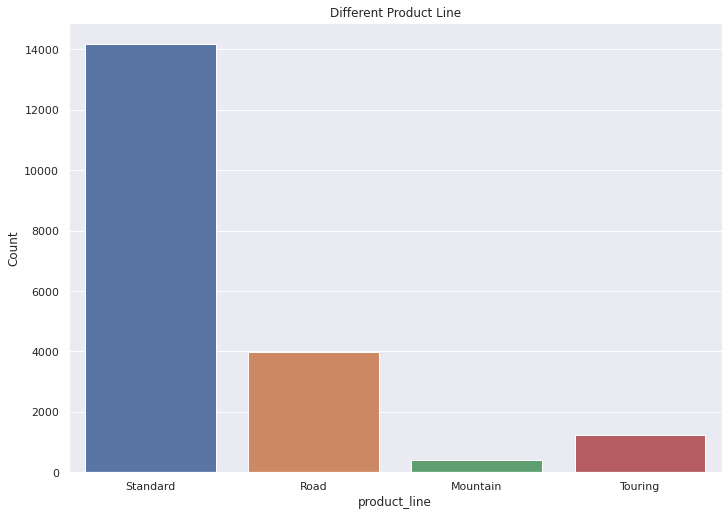

In [180]:
sns.set_style('darkgrid')
sns.countplot(Transactions_data['product_line'])
plt.title("Different Product Line")
plt.ylabel("Count")
print("Count of class is:\n",Transactions_data['product_line'].value_counts())


Check Product Class with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 medium    13826
high       3013
low        2964
Name: product_class, dtype: int64


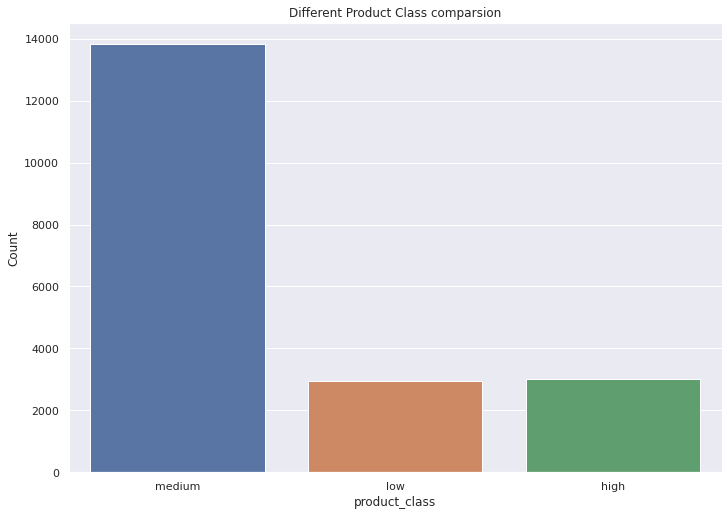

In [181]:
sns.set_style('darkgrid')
sns.countplot(Transactions_data['product_class'])
plt.title("Different Product Class comparsion")
plt.ylabel("Count")
print("Count of class is:\n",Transactions_data['product_class'].value_counts())


Check Product Size with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 medium    12990
large      3976
small      2837
Name: product_size, dtype: int64


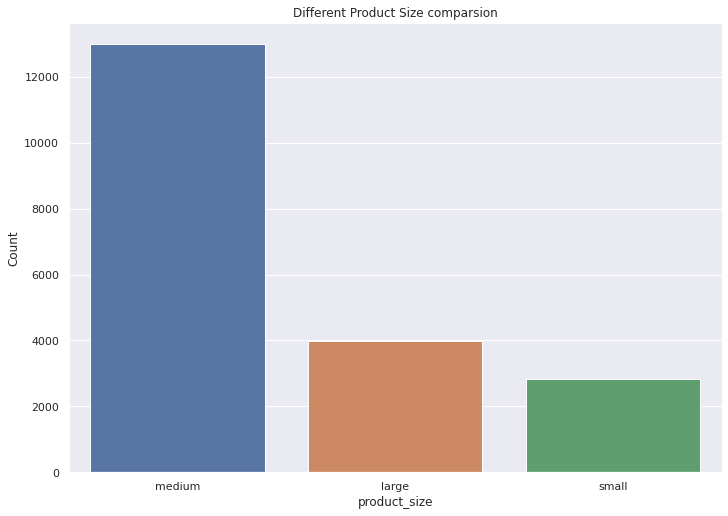

In [182]:
sns.set_style('darkgrid')
sns.countplot(Transactions_data['product_size'])
plt.title("Different Product Size comparsion")
plt.ylabel("Count")
print("Count of class is:\n",Transactions_data['product_size'].value_counts())


In [183]:
Transactions_data['product_first_sold_date']

0        41245.0
1        41701.0
2        36361.0
3        36145.0
4        42226.0
          ...   
19995    37823.0
19996    35560.0
19997    40410.0
19998    38216.0
19999    36334.0
Name: product_first_sold_date, Length: 20000, dtype: float64

In [184]:
#convert date column from integer to datetime
Transactions_data['product_first_sold_date'] = pd.to_datetime(Transactions_data['product_first_sold_date'], unit='s')
Transactions_data['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

In [185]:
Transactions_data['product_first_sold_date'].head(20)

0    1970-01-01 11:27:25
1    1970-01-01 11:35:01
2    1970-01-01 10:06:01
3    1970-01-01 10:02:25
4    1970-01-01 11:43:46
5    1970-01-01 10:50:31
6    1970-01-01 09:29:25
7    1970-01-01 11:05:15
8    1970-01-01 09:17:35
9    1970-01-01 10:36:56
10   1970-01-01 11:19:44
11   1970-01-01 11:42:52
12   1970-01-01 09:35:27
13   1970-01-01 09:36:26
14   1970-01-01 10:36:33
15   1970-01-01 10:31:13
16   1970-01-01 10:36:46
17   1970-01-01 09:24:48
18   1970-01-01 11:05:15
19   1970-01-01 10:22:17
Name: product_first_sold_date, dtype: datetime64[ns]

#### Correlation Analysis

In [186]:
Transactions_data.corr()


,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
transaction_id,1.000000,-0.011486,0.001753,0.003394,-0.006154,-0.003291
product_id,-0.011486,1.000000,0.004278,-0.004233,0.090066,0.038765
customer_id,0.001753,0.004278,1.000000,0.001616,0.009306,0.005365
online_order,0.003394,-0.004233,0.001616,1.000000,-0.000295,0.006934
list_price,-0.006154,0.090066,0.009306,-0.000295,1.000000,0.551539
standard_cost,-0.003291,0.038765,0.005365,0.006934,0.551539,1.000000


<AxesSubplot:>

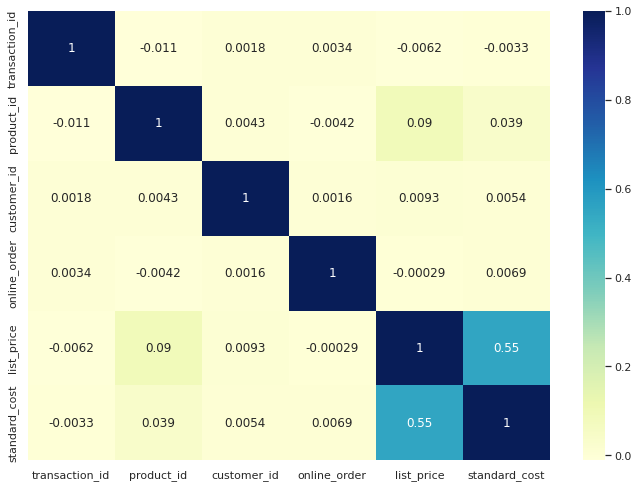

In [187]:
import seaborn as sb
sb.heatmap(Transactions_data.corr(), cmap="YlGnBu", annot=True)


Text(0.5, 1.0, 'Scatter plot between all variables')

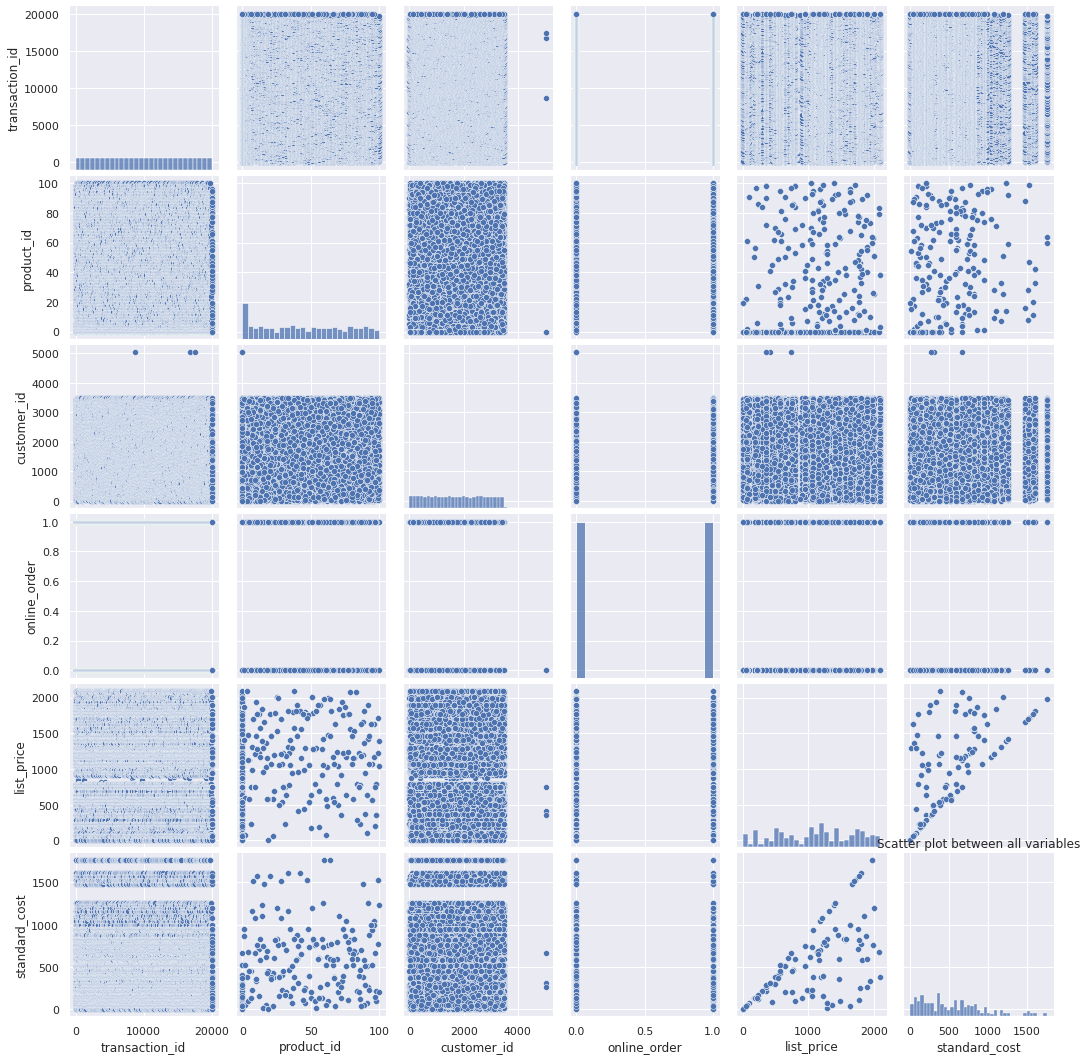

In [188]:
sns.pairplot(Transactions_data)
plt.title('Scatter plot between all variables')

The values in the product_first_sold_date columns are not correct as it shows everything happening the same day at different times.


## Exploring New Customer List Data Set

In [189]:
NewCustomerList_data.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6.0,0.97,1.2125,1.515625,1.288281,1,1.0,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11.0,1.08,1.0800,1.350000,1.147500,1,1.0,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5.0,1.00,1.0000,1.000000,1.000000,1,1.0,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1.0,0.72,0.9000,0.900000,0.900000,4,4.0,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9.0,0.55,0.5500,0.687500,0.687500,4,4.0,1.703125


In [190]:
NewCustomerList_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

####Checking the shape of the dataset

In [191]:
NewCustomerList_data.shape

(1000, 23)

####Dropping the unnamed columns

In [192]:
NewCustomerList_data.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)


####After Dropping also check the shape

In [193]:
NewCustomerList_data.shape

(1000, 18)

####Checking for null values

In [194]:
NewCustomerList_data.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

#### How many columns their in "NewCustomerList DATA"

In [195]:
print(len(NewCustomerList_data.columns))

18


#### Checking the duplicated Values and their sum

In [196]:
NewCustomerList_data.duplicated().sum()

0

#### Checking the Unique Values from this transactions dataset

In [197]:
NewCustomerList_data.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
dtype: int64

#### Check Missing Values for this New Customer List Data Frame

In [198]:
NewCustomerList_data.isna().head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Exploratory Data Analysis

In [199]:
NewCustomerList_data.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

Check Gender with its count plot and analysis

Count of class is:
 Female    513
Male      470
U          17
Name: gender, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


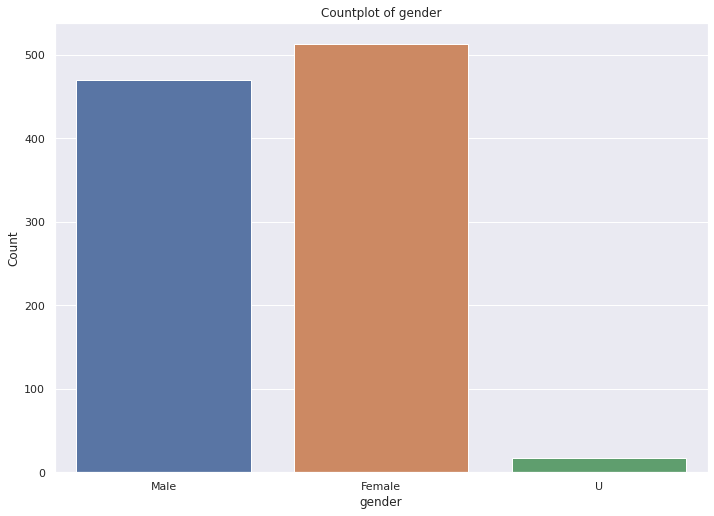

In [200]:
#create the count plot
sns.set_style('darkgrid')
sns.countplot(NewCustomerList_data['gender'])
plt.title("Countplot of gender")
#plt.xlabel('Gender')
plt.ylabel("Count")
print("Count of class is:\n",NewCustomerList_data['gender'].value_counts())

#### How many unspecified Gender are there

In [201]:
NewCustomerList_data[NewCustomerList_data.gender == "U"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4.0,7232 Fulton Parkway,3810.0,VIC,Australia,5.0,57.0,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11.0,6 Iowa Center,2519.0,NSW,Australia,9.0,226.0,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3.0,57025 New Castle Street,3850.0,VIC,Australia,3.0,324.0,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5.0,78 Clarendon Drive,4551.0,QLD,Australia,8.0,358.0,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11.0,5675 Burning Wood Trail,3030.0,VIC,Australia,7.0,361.0,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15.0,5773 Acker Way,4207.0,QLD,Australia,6.0,375.0,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7.0,72423 Surrey Street,3753.0,VIC,Australia,5.0,433.0,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14.0,3686 Waubesa Way,3065.0,VIC,Australia,6.0,436.0,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12.0,0307 Namekagon Crossing,2170.0,NSW,Australia,7.0,575.0,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5.0,882 Toban Lane,2121.0,NSW,Australia,11.0,599.0,0.775000


In [202]:
print("Count of class is:\n",NewCustomerList_data['DOB'].value_counts())

Count of class is:
 1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64


#### Check job_industry_category with its count plot and analysis

Count of class is:
 Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


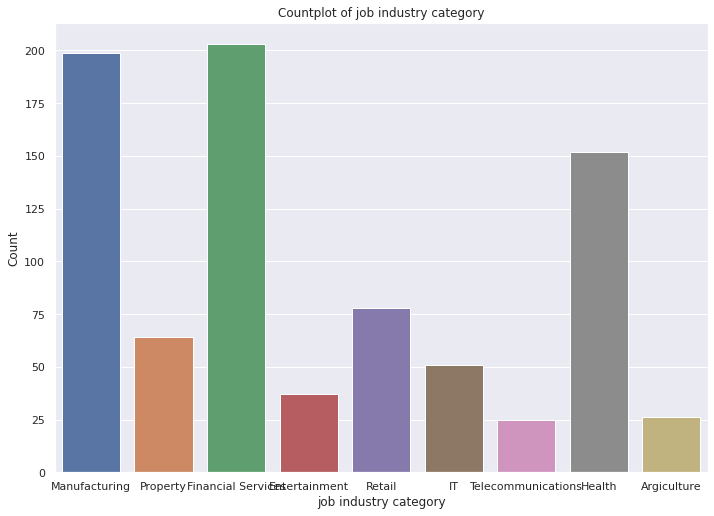

In [203]:
sns.set_style('darkgrid')
sns.countplot(NewCustomerList_data['job_industry_category'])
plt.title("Countplot of job industry category")
plt.xlabel('job industry category')
plt.ylabel("Count")
print("Count of class is:\n",NewCustomerList_data['job_industry_category'].value_counts())

#### Check wealth_segment with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64


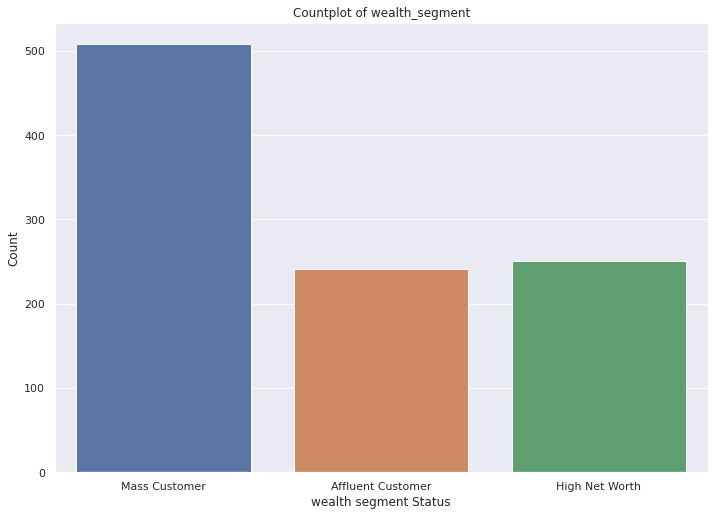

In [204]:
sns.set_style('darkgrid')
sns.countplot(NewCustomerList_data['wealth_segment'])
plt.title("Countplot of wealth_segment")
plt.xlabel('wealth segment Status')
plt.ylabel("Count")
print("Count of class is:\n",NewCustomerList_data['wealth_segment'].value_counts())


#### Check State with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 NSW    506
VIC    266
QLD    228
Name: state, dtype: int64


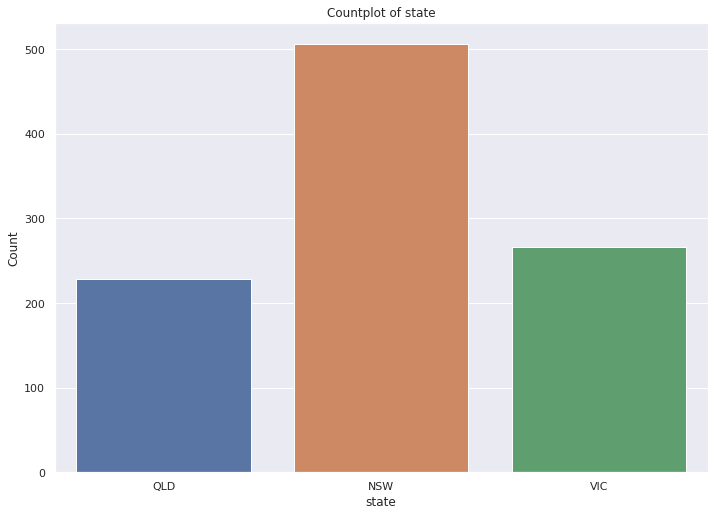

In [205]:
sns.set_style('darkgrid')
sns.countplot(NewCustomerList_data['state'])
plt.title("Countplot of state")
plt.xlabel('state')
plt.ylabel("Count")
print("Count of class is:\n",NewCustomerList_data['state'].value_counts())

#### Check Owns Car with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 No     507
Yes    493
Name: owns_car, dtype: int64


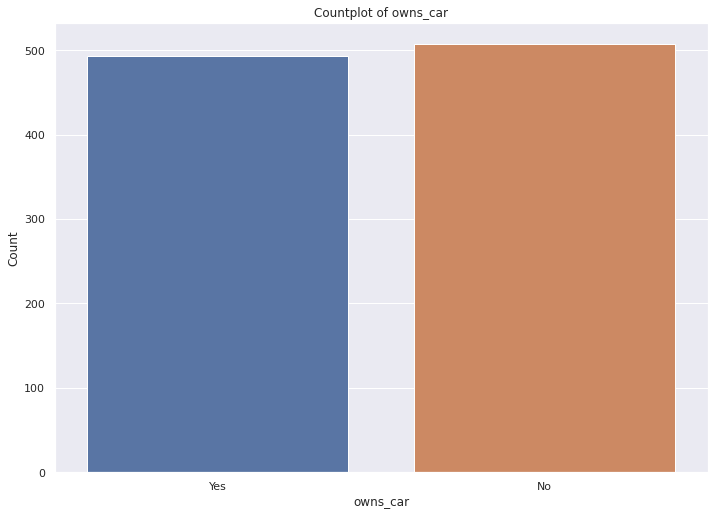

In [206]:
sns.set_style('darkgrid')
sns.countplot(NewCustomerList_data['owns_car'])
plt.title("Countplot of owns_car")
plt.xlabel('owns_car')
plt.ylabel("Count")
print("Count of class is:\n",NewCustomerList_data['owns_car'].value_counts())

#### Check Deceased Indicator with its count plot and analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 N    1000
Name: deceased_indicator, dtype: int64


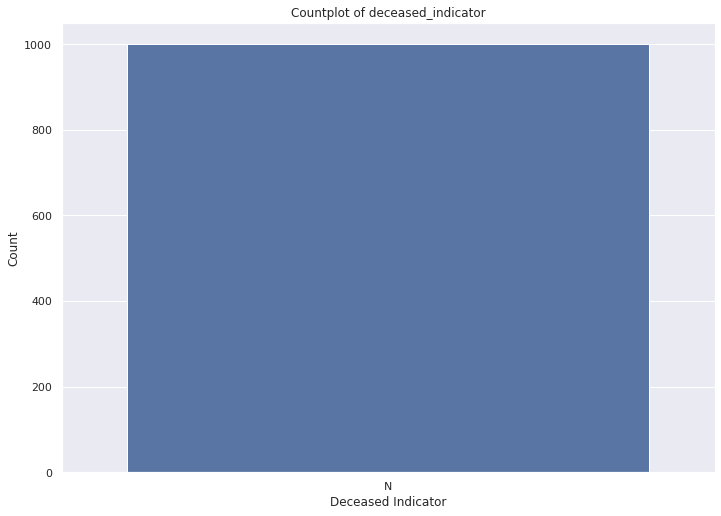

In [207]:
sns.set_style('darkgrid')
sns.countplot(NewCustomerList_data['deceased_indicator'])
plt.title("Countplot of deceased_indicator")
plt.xlabel('Deceased Indicator')
plt.ylabel("Count")
print("Count of class is:\n",NewCustomerList_data['deceased_indicator'].value_counts())

#### Co relation between all variables.

In [208]:
NewCustomerList_data.corr()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
past_3_years_bike_related_purchases,1.000000,-0.034183,0.015208,-0.010833,-0.004392,0.004884
tenure,-0.034183,1.000000,0.030573,-0.014913,0.005546,-0.012257
postcode,0.015208,0.030573,1.000000,-0.496725,-0.050190,0.055851
property_valuation,-0.010833,-0.014913,-0.496725,1.000000,0.016385,-0.014700
Rank,-0.004392,0.005546,-0.050190,0.016385,1.000000,-0.984093
Value,0.004884,-0.012257,0.055851,-0.014700,-0.984093,1.000000


#### New Customer List Co-relation with heat-map

<AxesSubplot:>

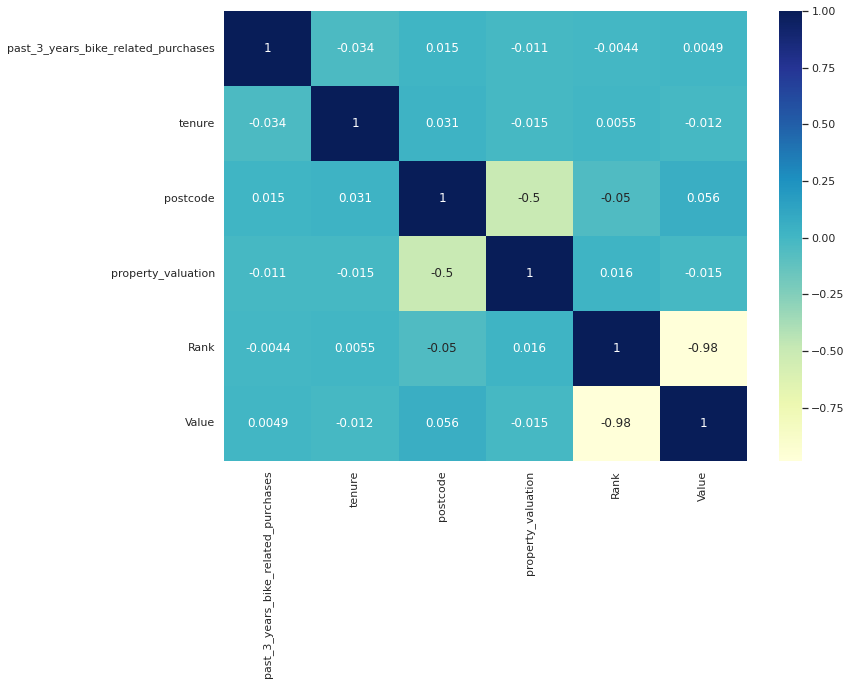

In [209]:
import seaborn as sb
sb.heatmap(NewCustomerList_data.corr(), cmap="YlGnBu", annot=True)

Text(0.5, 1.0, 'Scatter plot Numeric data relationship between all variables')

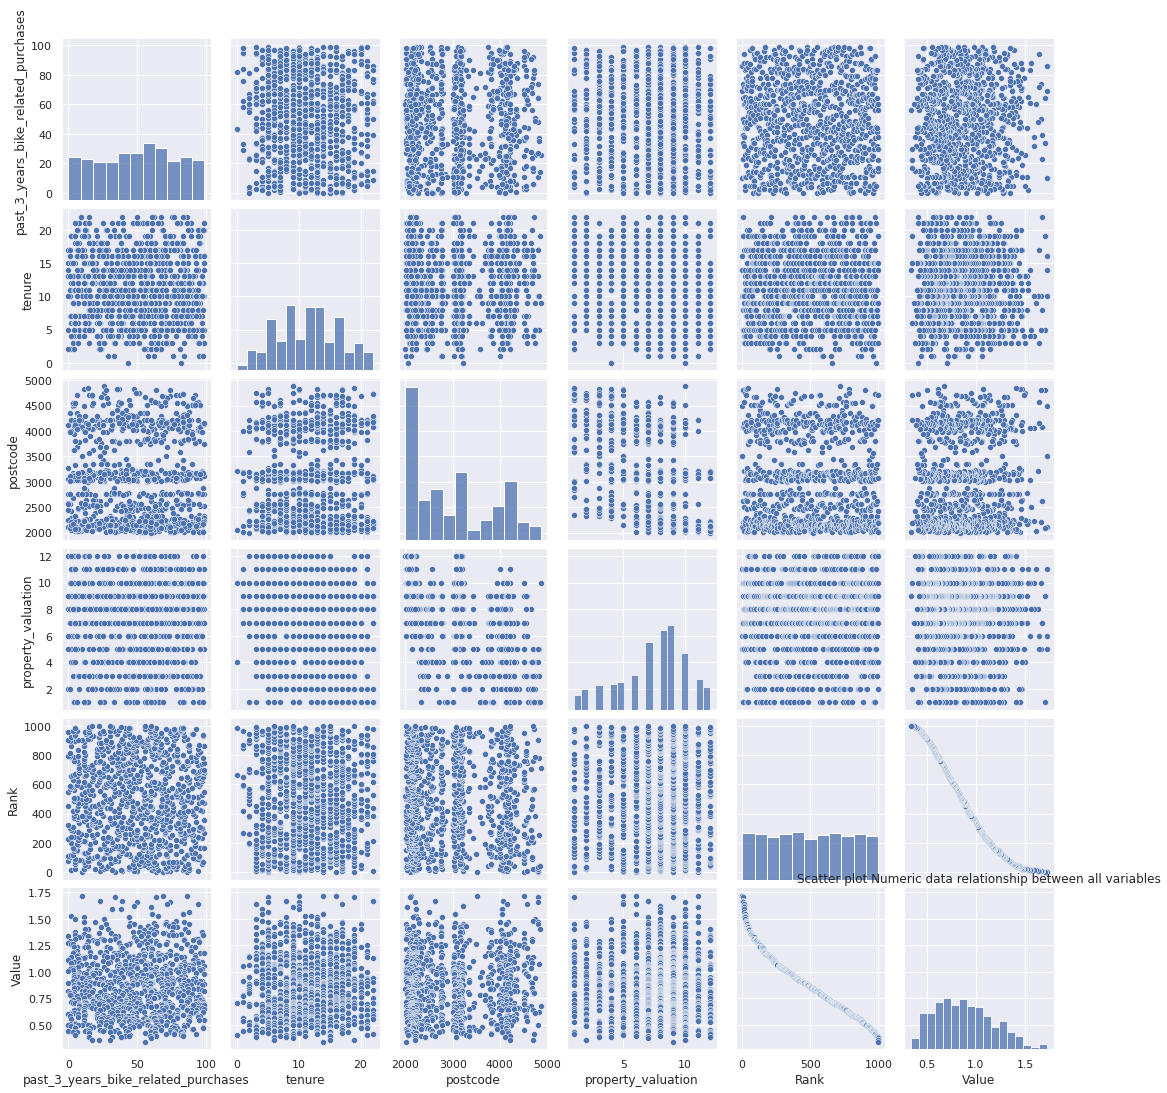

In [210]:
sns.pairplot(NewCustomerList_data)
plt.title('Scatter plot Numeric data relationship between all variables')

### Exploring Customer Demographic Data Set


In [211]:
customer_demo_graphic_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1.0,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3.0,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [212]:
customer_demo_graphic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   float64       
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

#### Checking for Null/missing values Values

In [213]:
customer_demo_graphic_data.isnull().sum()
#customer_demo_graphic_data.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

There are missing values in 6 columns. They can be dropped or treated according to the nature of analysis.


##### Five Point Summary 

In [214]:
customer_demo_graphic_data.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


#### Checking the duplicated Values and their sum

In [215]:
customer_demo_graphic_data.duplicated().sum()

0

#### Checking the Unique Values from this customer_demo_graphic_data dataset

In [216]:
customer_demo_graphic_data.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

#### Exploratory Data Analysis

Checking how many columns are present

In [217]:
customer_demo_graphic_data.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64


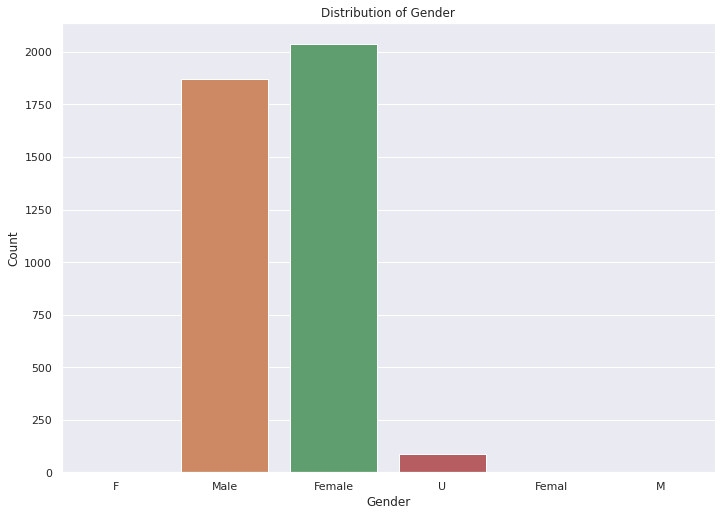

In [218]:
#create the count plot
sns.set_style('darkgrid')
sns.countplot(customer_demo_graphic_data['gender'])
plt.title("Distribution of Gender")
plt.xlabel('Gender')
plt.ylabel("Count")
print("Count of class is:\n",customer_demo_graphic_data['gender'].value_counts())

categories are not correctly titled. The names in these categories are re-named.

In [219]:
customer_demo_graphic_data['gender'] = customer_demo_graphic_data['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64


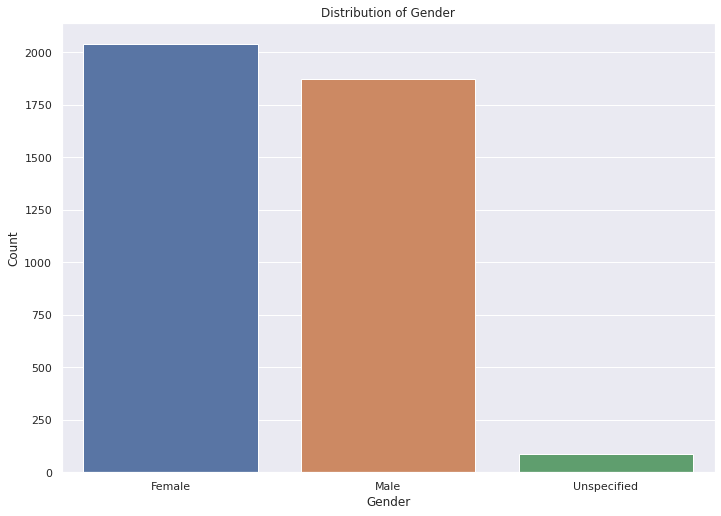

In [220]:
#create the count plot
sns.set_style('darkgrid')
sns.countplot(customer_demo_graphic_data['gender'])
plt.title("Distribution of Gender")
plt.xlabel('Gender')
plt.ylabel("Count")
print("Count of class is:\n",customer_demo_graphic_data['gender'].value_counts())

In [221]:
customer_demo_graphic_data["DOB"]

0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997          NaT
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [222]:
customer_demo_graphic_data["AGE"] = customer_demo_graphic_data["DOB"].astype("string")
df["age"] = customer_demo_graphic_data["DOB"].astype("string")
df["age"] = df["age"].dropna()
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month,born.day))

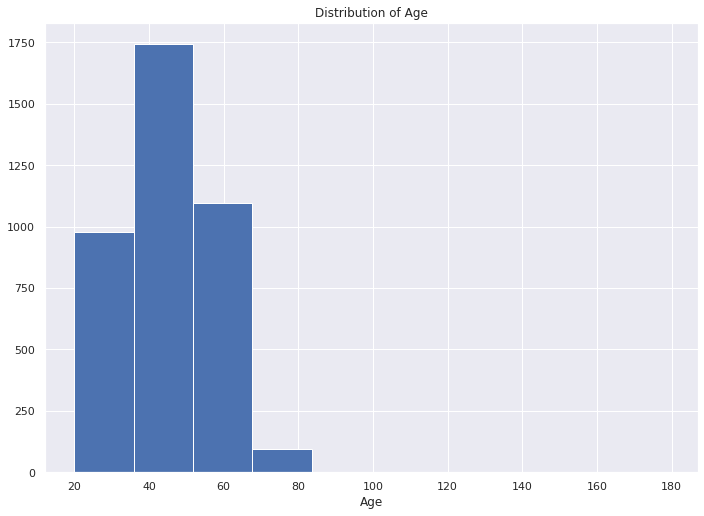

In [223]:
df["age"].apply(age).hist();
plt.title('Distribution of Age');
plt.xlabel('Age');

In [224]:
#create the count plot
print("Count of class is:\n",customer_demo_graphic_data['job_title'].value_counts())

Count of class is:
 Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64


Count of class is:
 Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


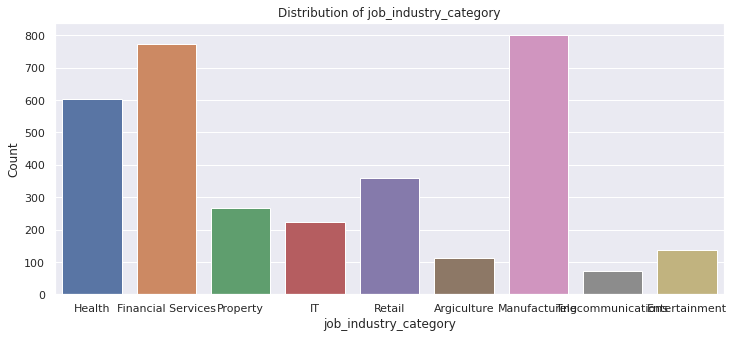

In [225]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(12, 5)})
sns.countplot(customer_demo_graphic_data['job_industry_category'])
plt.title("Distribution of job_industry_category")
plt.xlabel('job_industry_category')
plt.ylabel("Count")
print("Count of class is:\n",customer_demo_graphic_data['job_industry_category'].value_counts())


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64


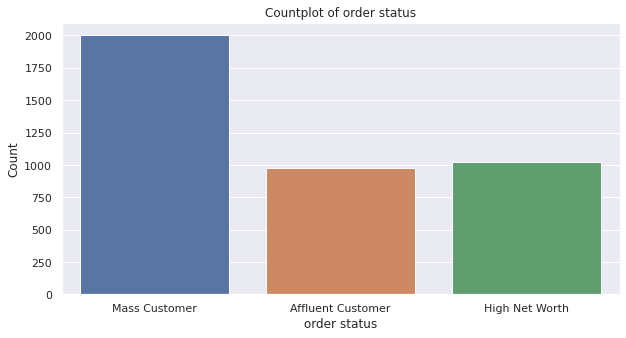

In [226]:
#create the count plot
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(10, 5)})
sns.countplot(customer_demo_graphic_data['wealth_segment'])
plt.title("Countplot of order status")
plt.xlabel('order status')
plt.ylabel("Count")
print("Count of class is:\n",customer_demo_graphic_data['wealth_segment'].value_counts())

In [227]:
customer_demo_graphic_data['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [228]:
#create the count plot
print("Count of class is:\n",customer_demo_graphic_data['past_3_years_bike_related_purchases'].value_counts())

Count of class is:
 16.0    56
19.0    56
67.0    54
20.0    54
2.0     50
        ..
8.0     28
95.0    27
85.0    27
86.0    27
92.0    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64


In [229]:
customer_demo_graphic_data['default'].value_counts()

100.0                                     113
1.0                                       112
-1.0                                      111
-100.0                                     99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

#### The values are inconsistent, hence dropping the column.

In [230]:
customer_demo_graphic_data = customer_demo_graphic_data.drop('default', axis=1)

In [231]:
customer_demo_graphic_data.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,AGE
0,1.0,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953-10-12
1,2.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980-12-16
2,3.0,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954-01-20
3,4.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1961-10-03
4,5.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,1977-05-13


Count of class is:
 Yes    2024
No     1976
Name: owns_car, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


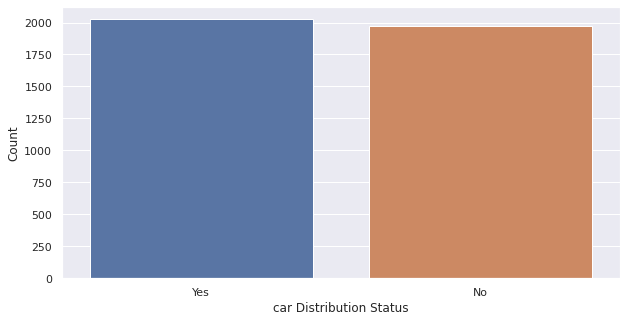

In [232]:
#create the count plot
sns.set_style('darkgrid')
sns.countplot(customer_demo_graphic_data['owns_car'])
#plt.title("car Distribution ....")
plt.xlabel('car Distribution Status')
plt.ylabel("Count")
print("Count of class is:\n",customer_demo_graphic_data['owns_car'].value_counts())

In [233]:
customer_demo_graphic_data['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

#### Exploring Customer Address Data Set

In [234]:
CustomerAddress_data.head()

,customer_id,address,postcode,state,country,property_valuation
0,1.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,5.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
4,6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


In [235]:
CustomerAddress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3999 non-null   float64
 1   address             3999 non-null   object 
 2   postcode            3999 non-null   float64
 3   state               3999 non-null   object 
 4   country             3999 non-null   object 
 5   property_valuation  3999 non-null   float64
dtypes: float64(3), object(3)
memory usage: 187.6+ KB


In [236]:
CustomerAddress_data.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


####Checking for null values.


In [237]:
CustomerAddress_data.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

How many columns their in "Customer Address Data"


In [238]:
print(len(CustomerAddress_data.columns))

6


#####Checking for duplicate values

In [239]:
CustomerAddress_data.duplicated().sum()

0

In [240]:
##Checking the Unique Values from this CustomerAddress_data dataset
CustomerAddress_data.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [241]:
#Check Missing Values for this CustomerAddress_data DataFrame
CustomerAddress_data.isna().head()

,customer_id,address,postcode,state,country,property_valuation
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


##### Exploratory Data Analysis

In [242]:
CustomerAddress_data.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [243]:
CustomerAddress_data['postcode'].value_counts()

2170.0    31
2155.0    30
2145.0    30
2153.0    29
3977.0    26
          ..
3808.0     1
3114.0     1
4721.0     1
4799.0     1
3089.0     1
Name: postcode, Length: 873, dtype: int64

Count of class is:
 NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


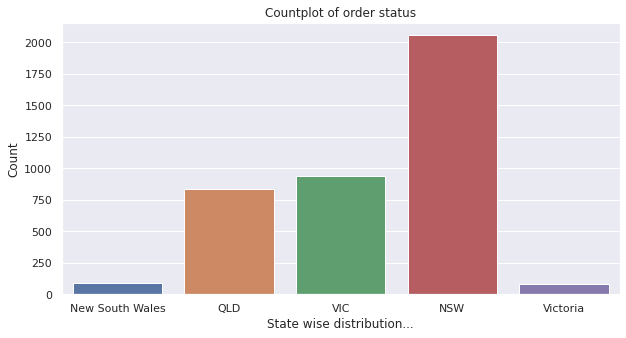

In [244]:
sns.set_style('darkgrid')
sns.countplot(CustomerAddress_data['state'])
plt.title("Countplot of order status")
plt.xlabel('State wise distribution...')
plt.ylabel("Count")
print("Count of class is:\n",CustomerAddress_data['state'].value_counts())

In [245]:
CustomerAddress_data['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [246]:
CustomerAddress_data['property_valuation'].value_counts()

9.0     647
8.0     646
10.0    577
7.0     493
11.0    281
6.0     238
5.0     225
4.0     214
12.0    195
3.0     186
1.0     154
2.0     143
Name: property_valuation, dtype: int64

### All the columns appear to have consistent and correct information.